In [1]:
import subprocess as sp
import sys,os,shutil,pickle,time
from os.path import join


In [2]:
import pandas as pd
import numpy as np

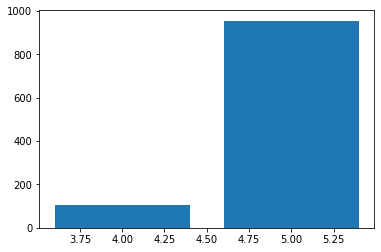

In [3]:
import matplotlib.pyplot as plt

dataset=pd.read_csv("samsungvaluemoney2.csv")
summarised_results = dataset["stars"].value_counts()
plt.bar(summarised_results.keys(), summarised_results.values)
plt.show()

In [4]:
df = pd.read_csv('samsungvaluemoney2.csv')
df.head(5)

,stars,comment,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word
0,5,plus true rounder boxes plusoverall samsung ga...,44,16,0,0,4,57,319,5.4
1,5,mesmerizing display excellent cameras value mone,1,2,0,0,0,6,49,7.3
2,5,good,0,0,0,0,0,1,4,4.0
3,5,nice,0,0,0,0,0,1,4,4.0
4,4,value mone,1,0,0,0,0,2,11,5.0


In [5]:
import seaborn as sns
import string
import re
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
from textblob import TextBlob

df['comment']= df['comment'].astype(str)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


df['polarity'] = df['comment'].apply(pol)
df['subjectivity'] = df['comment'].apply(sub)
df

,stars,comment,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word,polarity,subjectivity
0,5,plus true rounder boxes plusoverall samsung ga...,44,16,0,0,4,57,319,5.4,0.412121,0.610606
1,5,mesmerizing display excellent cameras value mone,1,2,0,0,0,6,49,7.3,0.650000,0.850000
2,5,good,0,0,0,0,0,1,4,4.0,0.700000,0.600000
3,5,nice,0,0,0,0,0,1,4,4.0,0.600000,1.000000
4,4,value mone,1,0,0,0,0,2,11,5.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1055,5,recently got mobile phone far working excellen...,5,1,0,0,1,8,54,5.9,0.366667,0.750000
1056,5,fantastic phonevalue mone,1,6,0,0,0,3,26,8.0,0.400000,0.900000
1057,5,awesome phone price range,2,0,0,0,0,4,25,5.5,1.000000,1.000000
1058,5,purchased value mone,1,3,0,0,0,4,22,6.3,0.000000,0.000000


In [7]:
df['polarity'] = df['polarity'].round(2)
df['subjectivity'] = df['subjectivity'].round(2)
df.sample(5)

,stars,comment,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word,polarity,subjectivity
92,5,good,0,0,0,0,0,1,4,4.0,0.70,0.60
719,5,purchased value mone,1,3,0,0,0,4,22,6.3,0.00,0.00
727,5,awesome phone price range,2,0,0,0,0,4,25,5.5,1.00,1.00
275,5,recently got mobile phone far working excellen...,5,1,0,0,1,8,54,5.9,0.37,0.75
3,5,nice,0,0,0,0,0,1,4,4.0,0.60,1.00


In [8]:
df2= pd.DataFrame()

In [9]:
for i in range (1,5):
  df2.loc[i,'polarity']= (df.head(100000).loc[df.stars == i].polarity.mean())
  df2.loc[i,'subjectivity']= (df.head(100000).loc[df.stars ==i].subjectivity.mean())

In [10]:
df2

,polarity,subjectivity
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,0.0,0.0


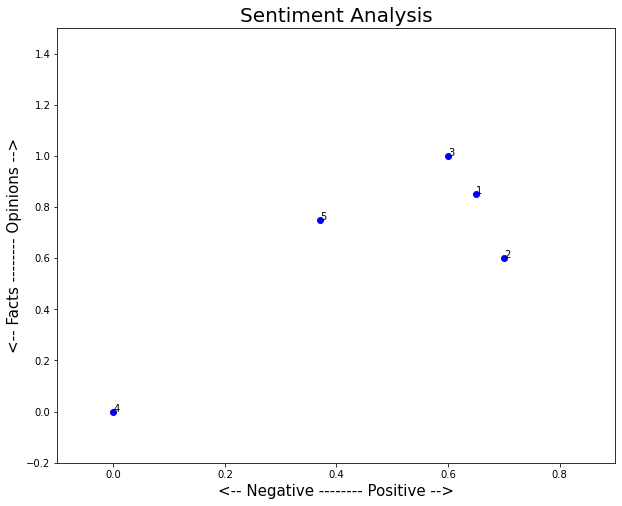

In [13]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index in range(1,6):
    x = df.polarity.loc[index]
    y = df.subjectivity.loc[index]
    plt.scatter(x, y, color='blue')
    plt.text(x+.0001, y+.0001, index, fontsize=10)
    plt.xlim(-0.1, .9) 
    plt.ylim(-0.2,1.5) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [14]:
df2= df
df2['word_count']= df2['word_count'] //50*50

<AxesSubplot:xlabel='word_count'>

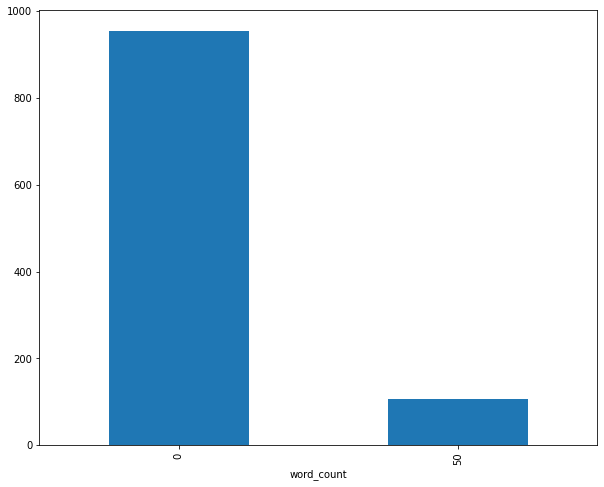

In [15]:
df.polarity.groupby(df.word_count // 50 * 50).count().plot(kind ='bar')

In [16]:
df_sub= df.loc[df.word_count //10*10]

/home/nalinjindal/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

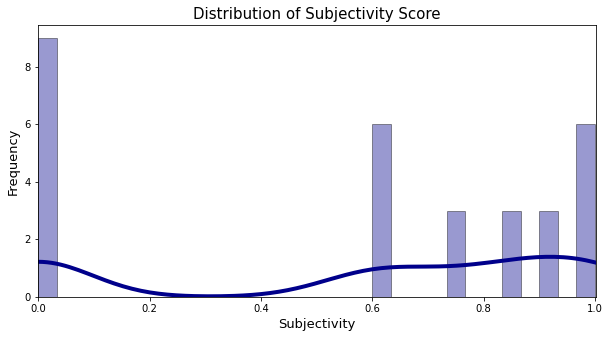

In [19]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)